In [1]:
%matplotlib inline

import logging
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import sys
sns.set_context('talk')

Assumes that the following rsync has happened:

`rsync -av orchids-compute:/data1/urebbapr/MLOC/notebooks/weather.comparison.v.baseline.scores.h5 .`

In [2]:
# df_scores_tsfresh_baseline

In [3]:
# df_scores_tsfresh_fullfeat

In [4]:
# fig, ax = plt.subplots(1, 3, figsize=(25, 7))

# ax[0].plot(df_scores.index, df_scores.RMSE)
# ax[0].set_ylabel('RMSE')
# ax[0].set_xlabel('Forecast (mins)')
# ax[0].set_xticks(range(0, 210, 30))

# ax[1].plot(df_scores.index, df_scores.MAPE*100)
# ax[1].set_ylabel('MAPE')
# ax[1].set_xlabel('Forecast (mins)')
# ax[1].set_xticks(range(0, 210, 30))

# ax[2].plot(df_scores.index, df_scores.R2)
# ax[2].set_ylabel('R2')
# ax[2].set_xlabel('Forecast (mins)')
# ax[2].set_xticks(range(0, 210, 30))
# plt.savefig('PWV_metrics.png')

# Now include with historical

In [7]:
def plot_baseline_comparison(name, df_scores_baseline, df_scores_fullfeat, units):

    fig, ax = plt.subplots(1, 3, figsize=(25, 7))

    ax[0].plot(df_scores_baseline.index, df_scores_baseline.RMSE, label='historical values only')
    ax[0].plot(df_scores_fullfeat.index, df_scores_fullfeat.RMSE, label='all weather features')

    ax[0].set_ylabel(f'RMSE ({units})')
    ax[0].set_xlabel('Forecast (mins)')
    ax[0].set_xticks(range(0, 210, 30))
    ax[0].legend()

    ax[1].plot(df_scores_baseline.index, df_scores_baseline.MAPE*100, label='historical values only')
    ax[1].plot(df_scores_fullfeat.index, df_scores_fullfeat.MAPE*100, label='all weather features')

    ax[1].set_ylabel('MAPE')
    ax[1].set_xlabel('Forecast (mins)')
    ax[1].set_xticks(range(0, 210, 30))

    ax[2].plot(df_scores_baseline.index, df_scores_baseline.R2, label='historical values only')
    ax[2].plot(df_scores_fullfeat.index, df_scores_fullfeat.R2, label='all weather features')
    ax[2].set_ylabel('R2')
    ax[2].set_xlabel('Forecast (mins)')
    ax[2].set_xticks(range(0, 210, 30))
    plt.savefig('{}-comparison_all_v_historical.png'.format(name))
    plt.show()

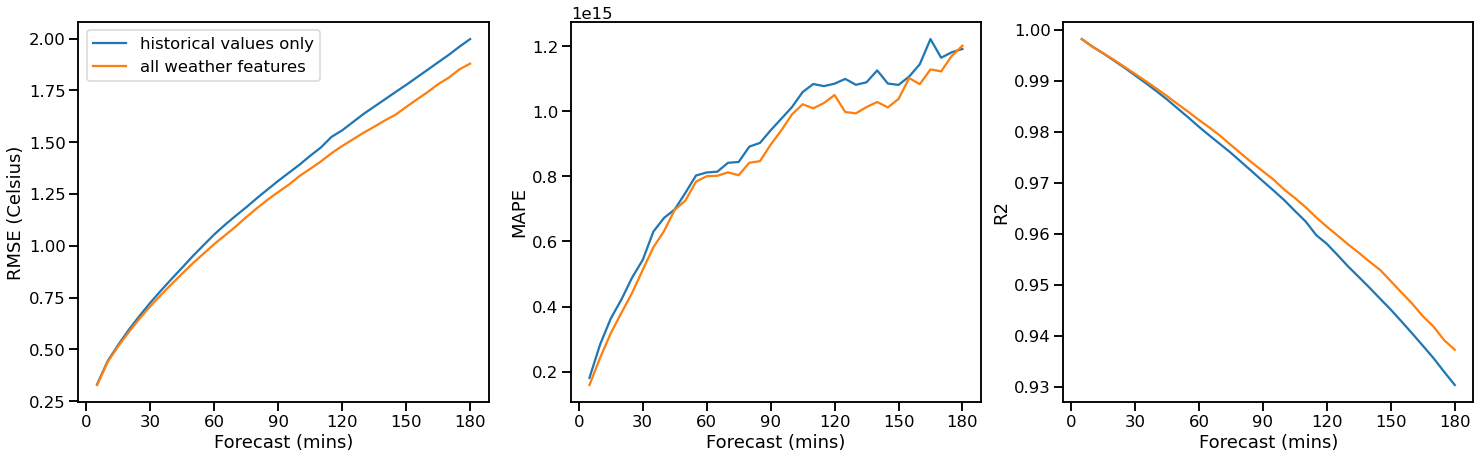

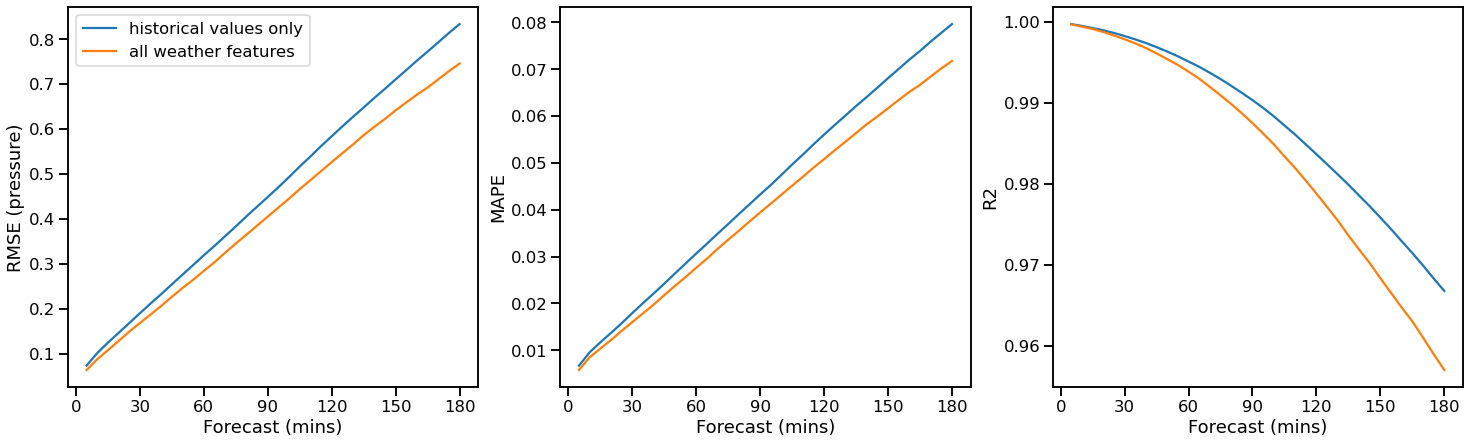

In [8]:
units = ['Celsius', 'pressure']

for i, input in enumerate(['temperature', 'pressure']):
    df_scores_tsfresh_baseline = pd.read_hdf('weather.comparison.v.baseline.scores.h5', f'/scores/{input}/tsfresh/baseline')
    df_scores_tsfresh_fullfeat = pd.read_hdf('weather.comparison.v.baseline.scores.h5', f'/scores/{input}/tsfresh/fullfeat')
    plot_baseline_comparison(input, df_scores_tsfresh_baseline, df_scores_tsfresh_fullfeat, units[i])